## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [2]:
nome_preco = pd.read_csv('Previsão_NY.csv')
nome_preco.head()

,id,nome,id_anfitrião,nome_anfitrião,grupo_bairros,bairro,latitude,longitude,tipo_acomodação,preço,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,quantidade_calculada_anuncio_anfitrião,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [3]:
# Definir um limite para "alto valor" (saber os 25% mais caros)
limite_alto_valor = nome_preco["preço"].quantile(0.75)

# Criar uma coluna dos locais
nome_preco["categoria_valor"] = nome_preco["preço"].apply(lambda x: "Alto Valor" if x >= limite_alto_valor else "Baixo/Médio Valor")

# Contar
nome_preco["categoria_valor"].value_counts()

categoria_valor
Baixo/Médio Valor    29058
Alto Valor            9784
Name: count, dtype: int64

In [4]:
# Função para limpar o texto e extrair palavras
def limpar_texto(texto):
    texto = texto.lower()  # Deixar tudo em minúsculas
    texto = re.sub(r'[^a-z\s]', '', texto)  # Remover caracteres especiais
    return texto

# Aplicar a limpeza nos nomes dos locais
nome_preco["nome_limpo"] = nome_preco["nome"].astype(str).apply(limpar_texto)

# Separar os nomes por categoria de valor
alto_valor = " ".join(nome_preco[nome_preco["categoria_valor"] == "Alto Valor"]["nome_limpo"])
baixo_valor = " ".join(nome_preco[nome_preco["categoria_valor"] == "Baixo/Médio Valor"]["nome_limpo"])

# Contar palavras mais frequentes
contador_alto = Counter(alto_valor.split())
contador_baixo = Counter(baixo_valor.split())

# Mostrar as palavras mais comuns nos locais de alto valor
print("Palavras mais frequentes nos locais de alto valor:", contador_alto.most_common(10))
print("Palavras mais frequentes nos locais de baixo/médio valor:", contador_baixo.most_common(10))

Palavras mais frequentes nos locais de alto valor: [('in', 2747), ('bedroom', 1561), ('apartment', 1493), ('br', 1271), ('apt', 1186), ('village', 887), ('the', 878), ('studio', 795), ('spacious', 792), ('loft', 747)]
Palavras mais frequentes nos locais de baixo/médio valor: [('in', 10563), ('room', 7923), ('private', 5399), ('bedroom', 4759), ('apartment', 3836), ('cozy', 3653), ('brooklyn', 2786), ('to', 2645), ('apt', 2544), ('studio', 2350)]


In [5]:
# Filtrar os imóveis mais caros (os 90)
top_percentual = nome_preco[nome_preco["preço"] > nome_preco["preço"].quantile(0.90)]

# Juntar todos os nomes e contar palavras mais frequentes
contagem_palavras = Counter(re.findall(r'\b\w+\b', ' '.join(top_percentual["nome"].dropna().str.lower())))

# mostrar as palavras mais comuns
print(contagem_palavras.most_common(20))

[('in', 913), ('2', 660), ('bedroom', 559), ('apartment', 411), ('loft', 388), ('apt', 370), ('luxury', 345), ('the', 292), ('village', 291), ('3', 287), ('park', 268), ('with', 266), ('manhattan', 265), ('spacious', 263), ('of', 245), ('1', 229), ('nyc', 227), ('w', 225), ('to', 213), ('private', 212)]


In [6]:
# Lista de palavras-chave associadas a preços altos
palavras_chave = ["luxury", "loft", "spacious", "private", "penthouse", "exclusive", "villa"]

# Criar a variável binária
nome_preco["palavra_chave"] = nome_preco["nome"].str.lower().apply(lambda x: any(word in x for word in palavras_chave) if pd.notnull(x) else False)

# Verificar a distribuição da nova variável
print(nome_preco["palavra_chave"].value_counts())

palavra_chave
False    25866
True     12976
Name: count, dtype: int64


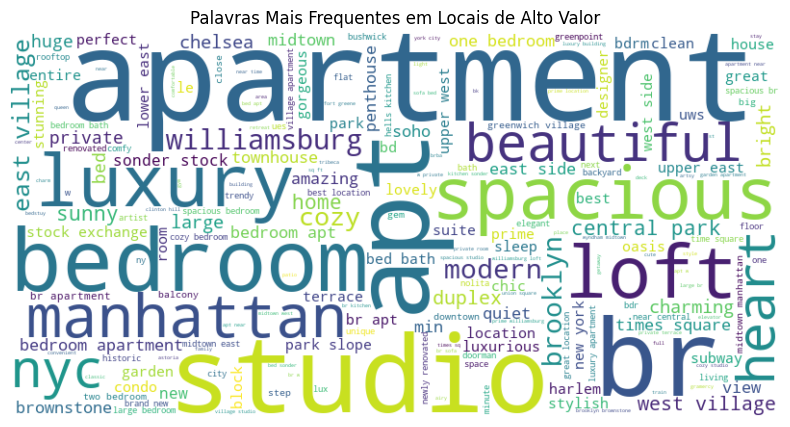

In [7]:
# Criar e mostrar a nuvem de palavras dos locais de alto valor
wordcloud_alto = WordCloud(width=800, height=400, background_color='white').generate(alto_valor)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_alto, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras Mais Frequentes em Locais de Alto Valor")
plt.show()

Percebemos um padrão de palavras atrativas, que indicam exclusividade, sofisticação, modernidade.